# TP SVM Télécom ParisTech

In [108]:
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

## Question 1

In [90]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
X = X[y != 0, :2] # Train dataset, we use only 2 features for now
y = y[y != 0] # Train prediction variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
print(X_train.shape,y_train.shape)

(50, 2) (50,)


In [91]:
clf = SVC(kernel = 'linear')
print(X_train.shape, y_train.shape)
clf.fit(X_train, y_train)
print("noyau linéaire, précision :", clf.score(X_test, y_test))
scores = cross_val_score(clf,X, y, cv = 5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

(50, 2) (50,)
noyau linéaire, précision : 0.66
Accuracy: 0.72 (+/- 0.16)


## Question 2

In [97]:
clf = SVC(kernel="poly", degree=3)
clf.fit(X_train, y_train)
print("noyau polynomial, précision :", clf.score(X_test, y_test))
scores = cross_val_score(clf,X, y, cv = 5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

noyau polynomial, précision : 0.7
Accuracy: 0.72 (+/- 0.16)


## Question 3

La deuxième contrainte de l'équation (2) peut se réécrire
$$ \xi_i \geq 1-y_i(\langle w,\Phi(x_i) \rangle + \omega_0) \;\; \forall i$$

Par ailleurs la plus petite valeure de $\xi_i$ est $0$ (première contrainte de (2)), ce qui correspond au fait que le point $i$ soit du bon côté de sa marge. On peut alors écrire:

$$  \xi_i \geq \left[1-y_i(\langle w,\Phi(x_i) \rangle + \omega_0)\right]_+ \geq 0 \;\; \forall i$$

Cette nouvelle contrainte inclus les deux contraintes initiales de l'équation (2).

$\xi_i$ étant le coût d'une mauvaise classification, on peut remplacer $\xi_i$ par $\left[1-y_i(\langle w,\Phi(x_i) \rangle + \omega_0)\right]_+$ dans l'expression à minimiser. Le coût d'une mauvaise classification est alors inférieur au coût $\xi_i$, mais les contraintes qui apparaissaient dans l'expression initiale du problème primal disparaissent (elles sont inclues dans la fonction Hinge).  



## Question 4

L'erreur de classification qui vaut 1 ou 0 est constituée de deux plateaux, il est donc compliqué de chercher à minimiser directement cette fonction puisque son gradient est nul partout et qu'elle possède une discontinuité. La fonction Hinge est bien un majorant de l'erreur de classification (voir figure ci-dessous). Et cette fonction est convexe, ce qui permet de la minimiser avec une des méthodes utilisant le gradient.

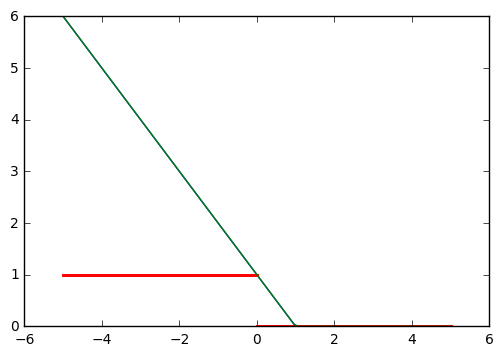

In [110]:
x = np.linspace(-5, 5, 100)
x_m = np.linspace(-5, 0, 5)
x_p = np.linspace(0, 5, 5)
hinge = [max(0, 1-i) for i in x]
plt.plot(x_m, np.ones(5), 'r', lw=2)
plt.plot(x_p, np.zeros(5), 'r', lw=2, label='classif error')
plt.plot(x, hinge, label='hinge loss')
plt.show()